In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

train_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')
subm = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv')

print("The Training dataset is made of {} rows and {} columns.".format(len(train_df), len(train_df.columns)))


The Training dataset is made of 800000 rows and 33 columns.


In [3]:
pd.options.display.max_columns = train_df.shape[1]
train_df.head()


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-0.249088,0.530642,0.335227,0.806819,-0.184190,-0.560442,1.253767,2,1,1,0,2,6,0,1,1,3,2,1,0.227588,0.736091,3.929629,-1.100706,-0.078688,2.160728,0.002502,-0.827445,ACBADABECB,158.820720,0,1,1
1,1,-0.312833,0.033082,-0.571193,1.311494,0.991718,-0.138249,1.834627,2,1,2,2,1,1,2,2,4,3,0,3,2.045127,-6.621721,2.618636,1.089416,-2.701227,-1.846792,9.539707,2.443596,BBBCAAAFDE,211.389880,0,0,0
2,2,-0.370032,1.501016,0.288983,0.077866,-0.329701,0.030314,0.384582,1,3,1,4,1,2,4,0,3,1,1,5,-0.216397,-1.925156,-4.053491,0.313065,0.293554,-3.490299,2.002782,0.593525,BDAEAABICD,81.745258,1,0,0
3,3,-1.011059,-0.341850,1.415175,-2.128660,1.137287,-3.200017,0.289945,7,2,2,1,0,5,3,4,2,4,0,3,1.384242,0.295569,-1.792767,-0.626560,0.989921,-0.760995,-3.276785,-2.534943,BAABFADDCA,-644.638548,0,0,1
4,4,0.756528,0.503700,0.935057,-2.321849,-0.002466,0.058981,-0.163493,1,0,2,3,2,0,2,3,3,1,2,1,-0.401157,2.618615,-0.877557,-1.504338,0.632537,1.812423,2.883524,-1.089711,AABFBBEMHC,-140.205455,0,2,1


In [4]:
columns = train_df.dtypes

for elem in range(len(columns.index)):
    print("- {}: type {} \n".format(columns.index[elem], columns.values[elem]))


- id: type int64 

- f_00: type float64 

- f_01: type float64 

- f_02: type float64 

- f_03: type float64 

- f_04: type float64 

- f_05: type float64 

- f_06: type float64 

- f_07: type int64 

- f_08: type int64 

- f_09: type int64 

- f_10: type int64 

- f_11: type int64 

- f_12: type int64 

- f_13: type int64 

- f_14: type int64 

- f_15: type int64 

- f_16: type int64 

- f_17: type int64 

- f_18: type int64 

- f_19: type float64 

- f_20: type float64 

- f_21: type float64 

- f_22: type float64 

- f_23: type float64 

- f_24: type float64 

- f_25: type float64 

- f_26: type float64 

- f_27: type object 

- f_28: type float64 

- f_29: type int64 

- f_30: type int64 

- target: type int64 



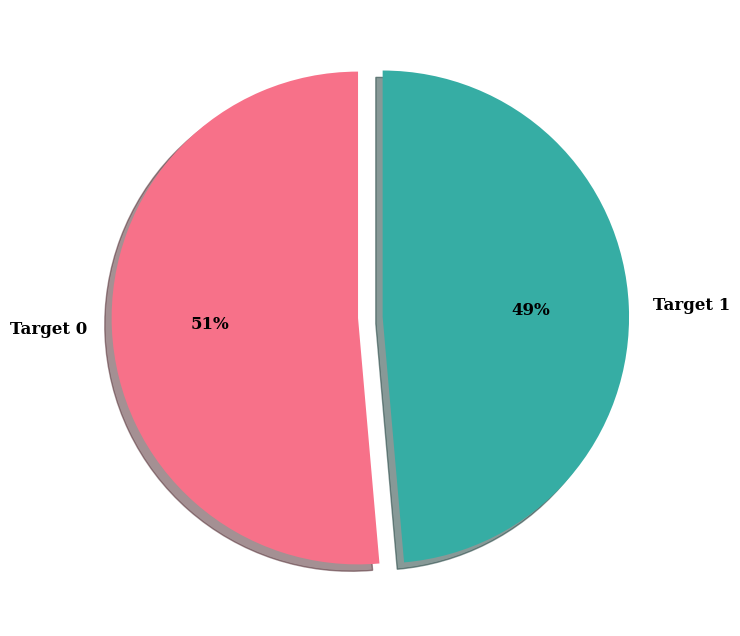

In [5]:
counting = train_df['target'].value_counts()
lbl = []
for elem in counting.index:
    lbl.append('Target {}'.format(counting.index.values[elem]))

plt.figure(figsize=(15,8))
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

colors = sns.color_palette("husl", 2)
plt.pie(counting, labels = lbl, colors = colors, autopct='%.0f%%', explode=(0, 0.1),
        shadow=True, startangle=90
       )
plt.show()


In [6]:
print("The number of missing values in the training set is equal to: {}.".format(train_df.isnull().sum().sum()))


The number of missing values in the training set is equal to: 0.


In [7]:
features = train_df.drop(columns = ['id', 'target'])


In [8]:
x_float = train_df.select_dtypes('float64')
x_float.describe()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,-0.000459,0.001238,0.001304,-0.001661,-0.000565,0.001002,-0.000375,0.309232,-0.179289,-0.157764,-0.008572,-0.369088,-0.343851,0.177661,0.357211,-0.342971
std,0.999129,0.999037,1.000579,0.999752,1.000103,1.000012,0.999611,2.315666,2.400877,2.484911,2.451003,2.453490,2.387769,2.417369,2.476611,238.669667
min,-4.599856,-4.674340,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,-10.912201,-11.257917,-13.310146,-11.853530,-12.301097,-11.416189,-11.830669,-14.300577,-1229.753052
25%,-0.675582,-0.675138,-0.673779,-0.675956,-0.676083,-0.672346,-0.674166,-1.235510,-1.805626,-1.823320,-1.644508,-2.019120,-1.956868,-1.440067,-1.260982,-159.306345
50%,0.000584,0.002630,0.003100,-0.002554,-0.001653,0.000298,-0.001251,0.330411,-0.190707,-0.154553,0.031246,-0.389553,-0.341667,0.161729,0.404877,-0.491223
75%,0.674429,0.674935,0.677651,0.671845,0.673841,0.676137,0.675171,1.880869,1.444766,1.505832,1.662316,1.255875,1.265846,1.797881,2.027749,158.931318
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,12.079667,11.475325,11.679436,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577


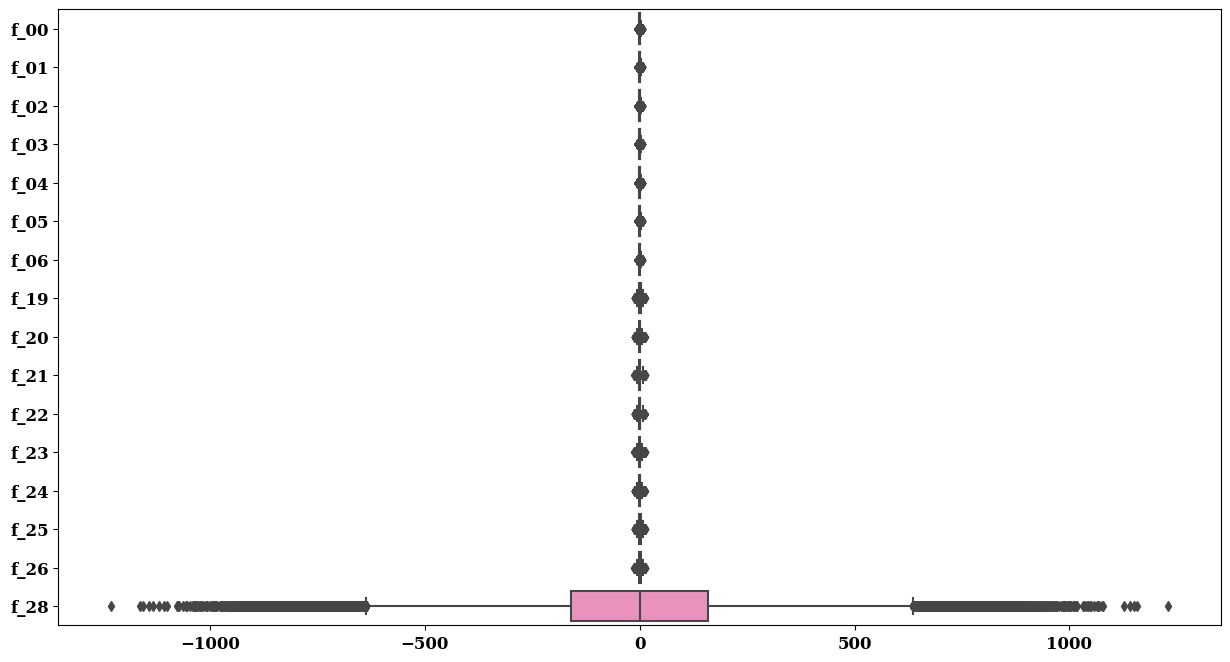

In [9]:
sns.color_palette("husl", 8)
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=x_float, orient="h")


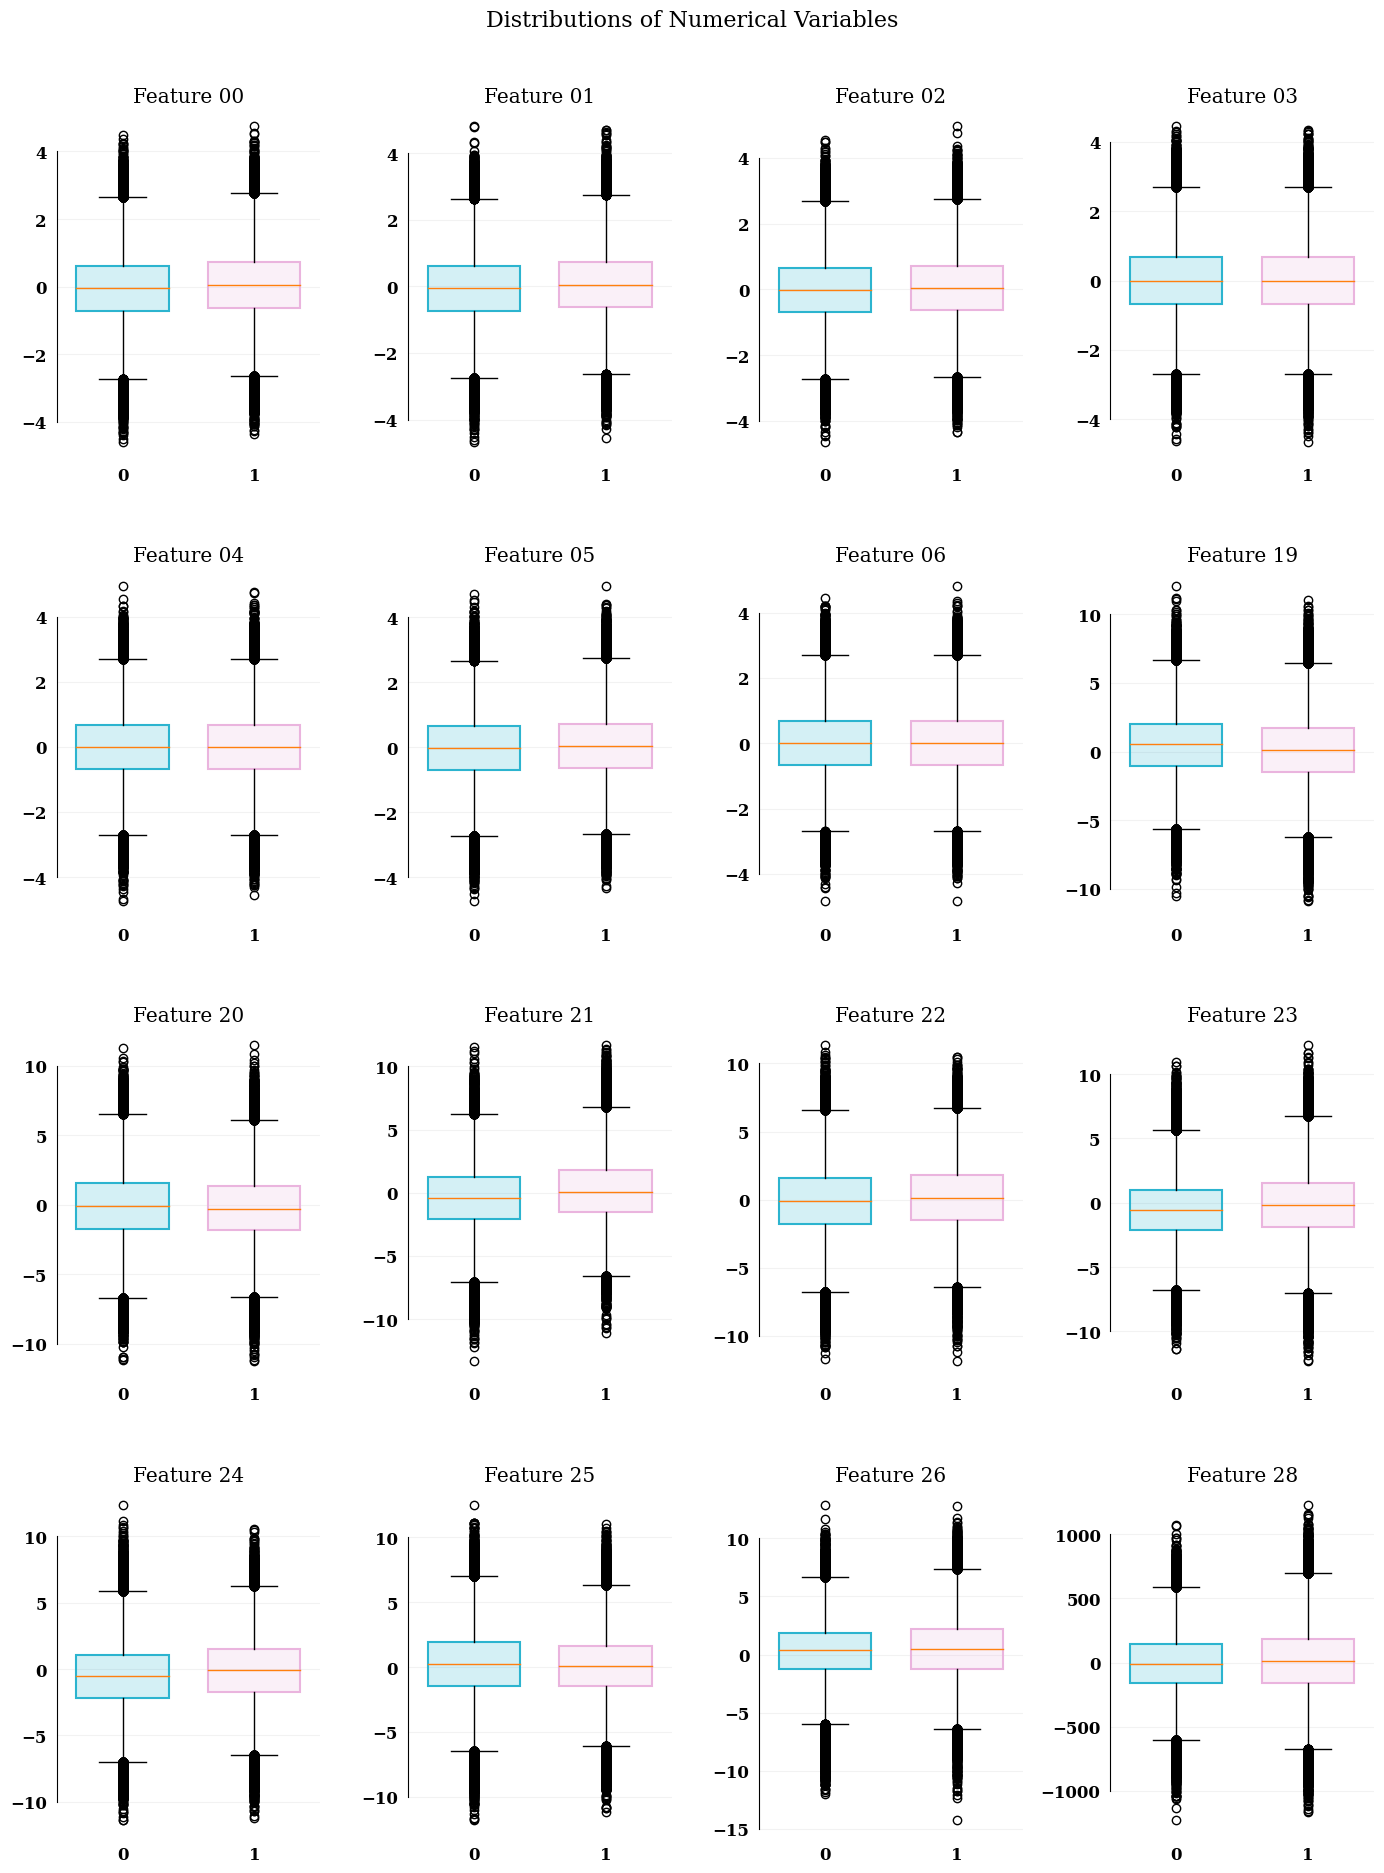

In [10]:
float_and_tgt=pd.concat([x_float,train_df['target']], axis=1)
titles=['Feature {}'.format(i.split('_')[-1]) for i in x_float]
fig, ax = plt.subplots(4,4, figsize=(14,24))
row=0
col=[0,1,2,3]*4
for i, column in enumerate(float_and_tgt.columns[:-1]):
    if (i!=0) & (i%4==0):
        row+=1
    color='#2CB4CF'
    rgb=matplotlib.colors.to_rgba(color,0.2)
    ax[row,col[i]].boxplot(float_and_tgt[float_and_tgt['target']==0][column], positions=[0],
                           widths=0.7, patch_artist=True,
                           boxprops=dict(color=color, facecolor=rgb, linewidth=1.5))
    color='#EAB4DE'
    rgb=matplotlib.colors.to_rgba(color,0.2)
    ax[row,col[i]].boxplot(float_and_tgt[float_and_tgt['target']==1][column], positions=[1],
                           widths=0.7, patch_artist=True,
                           boxprops=dict(color=color, facecolor=rgb, linewidth=1.5))
    ax[row,col[i]].grid(visible=True, which='major', axis='y', color='#F2F2F2')
    ax[row,col[i]].tick_params(left=False,bottom=False)
    ax[row,col[i]].set_title('\n\n{}'.format(titles[i]))
sns.despine(bottom=True, trim=True)
plt.suptitle('Distributions of Numerical Variables',fontsize=16)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])


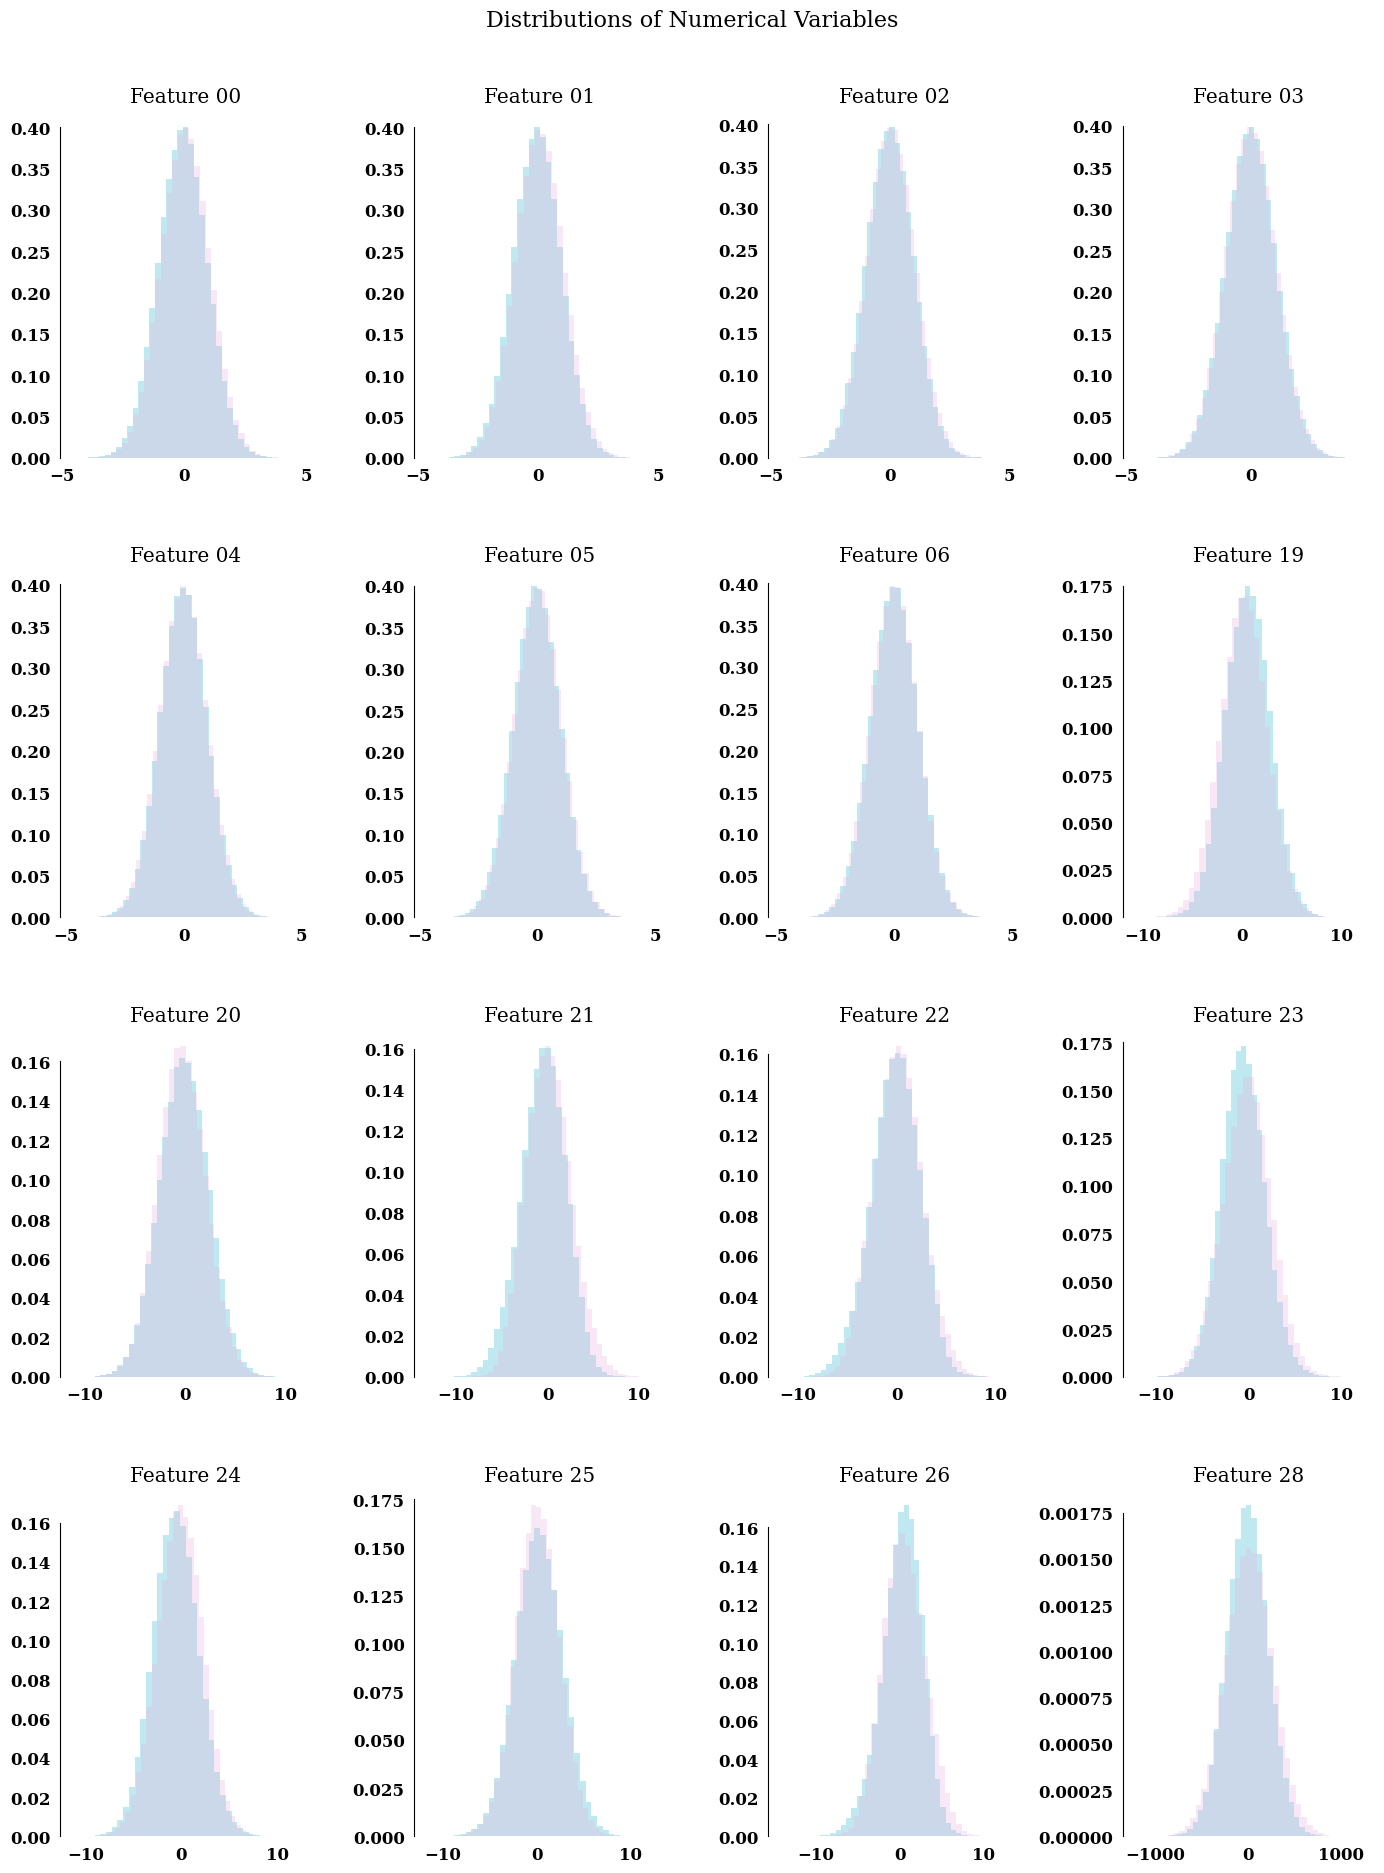

In [11]:
float_and_tgt=pd.concat([x_float,train_df['target']], axis=1)
titles=['Feature {}'.format(i.split('_')[-1]) for i in x_float]
fig, ax = plt.subplots(4,4, figsize=(14,24))
row=0
col=[0,1,2,3]*4
for i, column in enumerate(float_and_tgt.columns[:-1]):
    if (i!=0) & (i%4==0):
        row+=1
    color='#2CB4CF'
    rgb=matplotlib.colors.to_rgba(color,0.3)
    ax[row,col[i]].hist(float_and_tgt[float_and_tgt['target']==0][column],
                        color=rgb, density=True, bins=40)
    color='#EAB4DE'
    rgb=matplotlib.colors.to_rgba(color,0.3)
    ax[row,col[i]].hist(float_and_tgt[float_and_tgt['target']==1][column],
                       color=rgb, density=True, bins=40)
    #ax[row,col[i]].grid(visible=True, which='major', axis='y', color='#F2F2F2')
    ax[row,col[i]].tick_params(left=False,bottom=False)
    ax[row,col[i]].set_title('\n\n{}'.format(titles[i]))
sns.despine(bottom=True, trim=True)
plt.suptitle('Distributions of Numerical Variables',fontsize=16)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

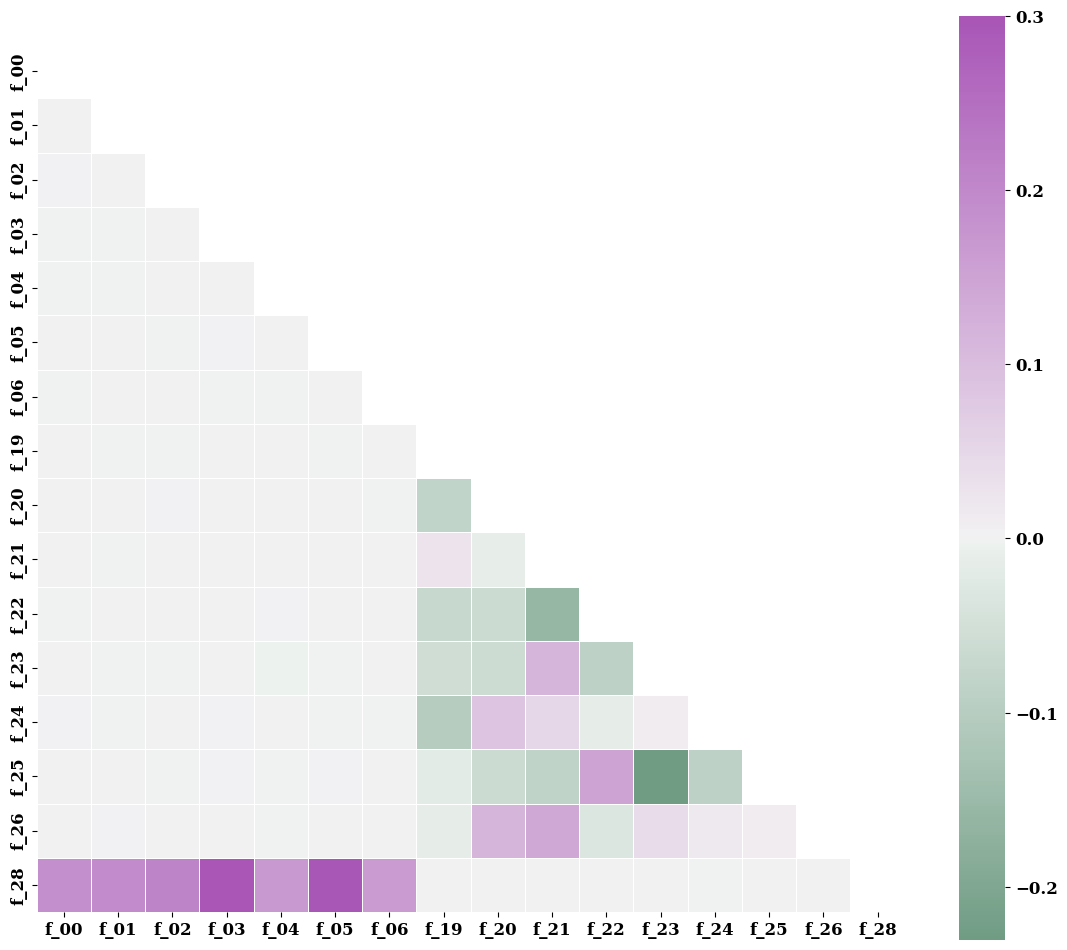

In [12]:
corr = x_float.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(14, 24))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [13]:
x_int = train_df.select_dtypes('int64')
x_int = x_int.drop('id', axis=1)
#x_int_tgt = pd.concat([x_int,train_df['target']], axis=1)


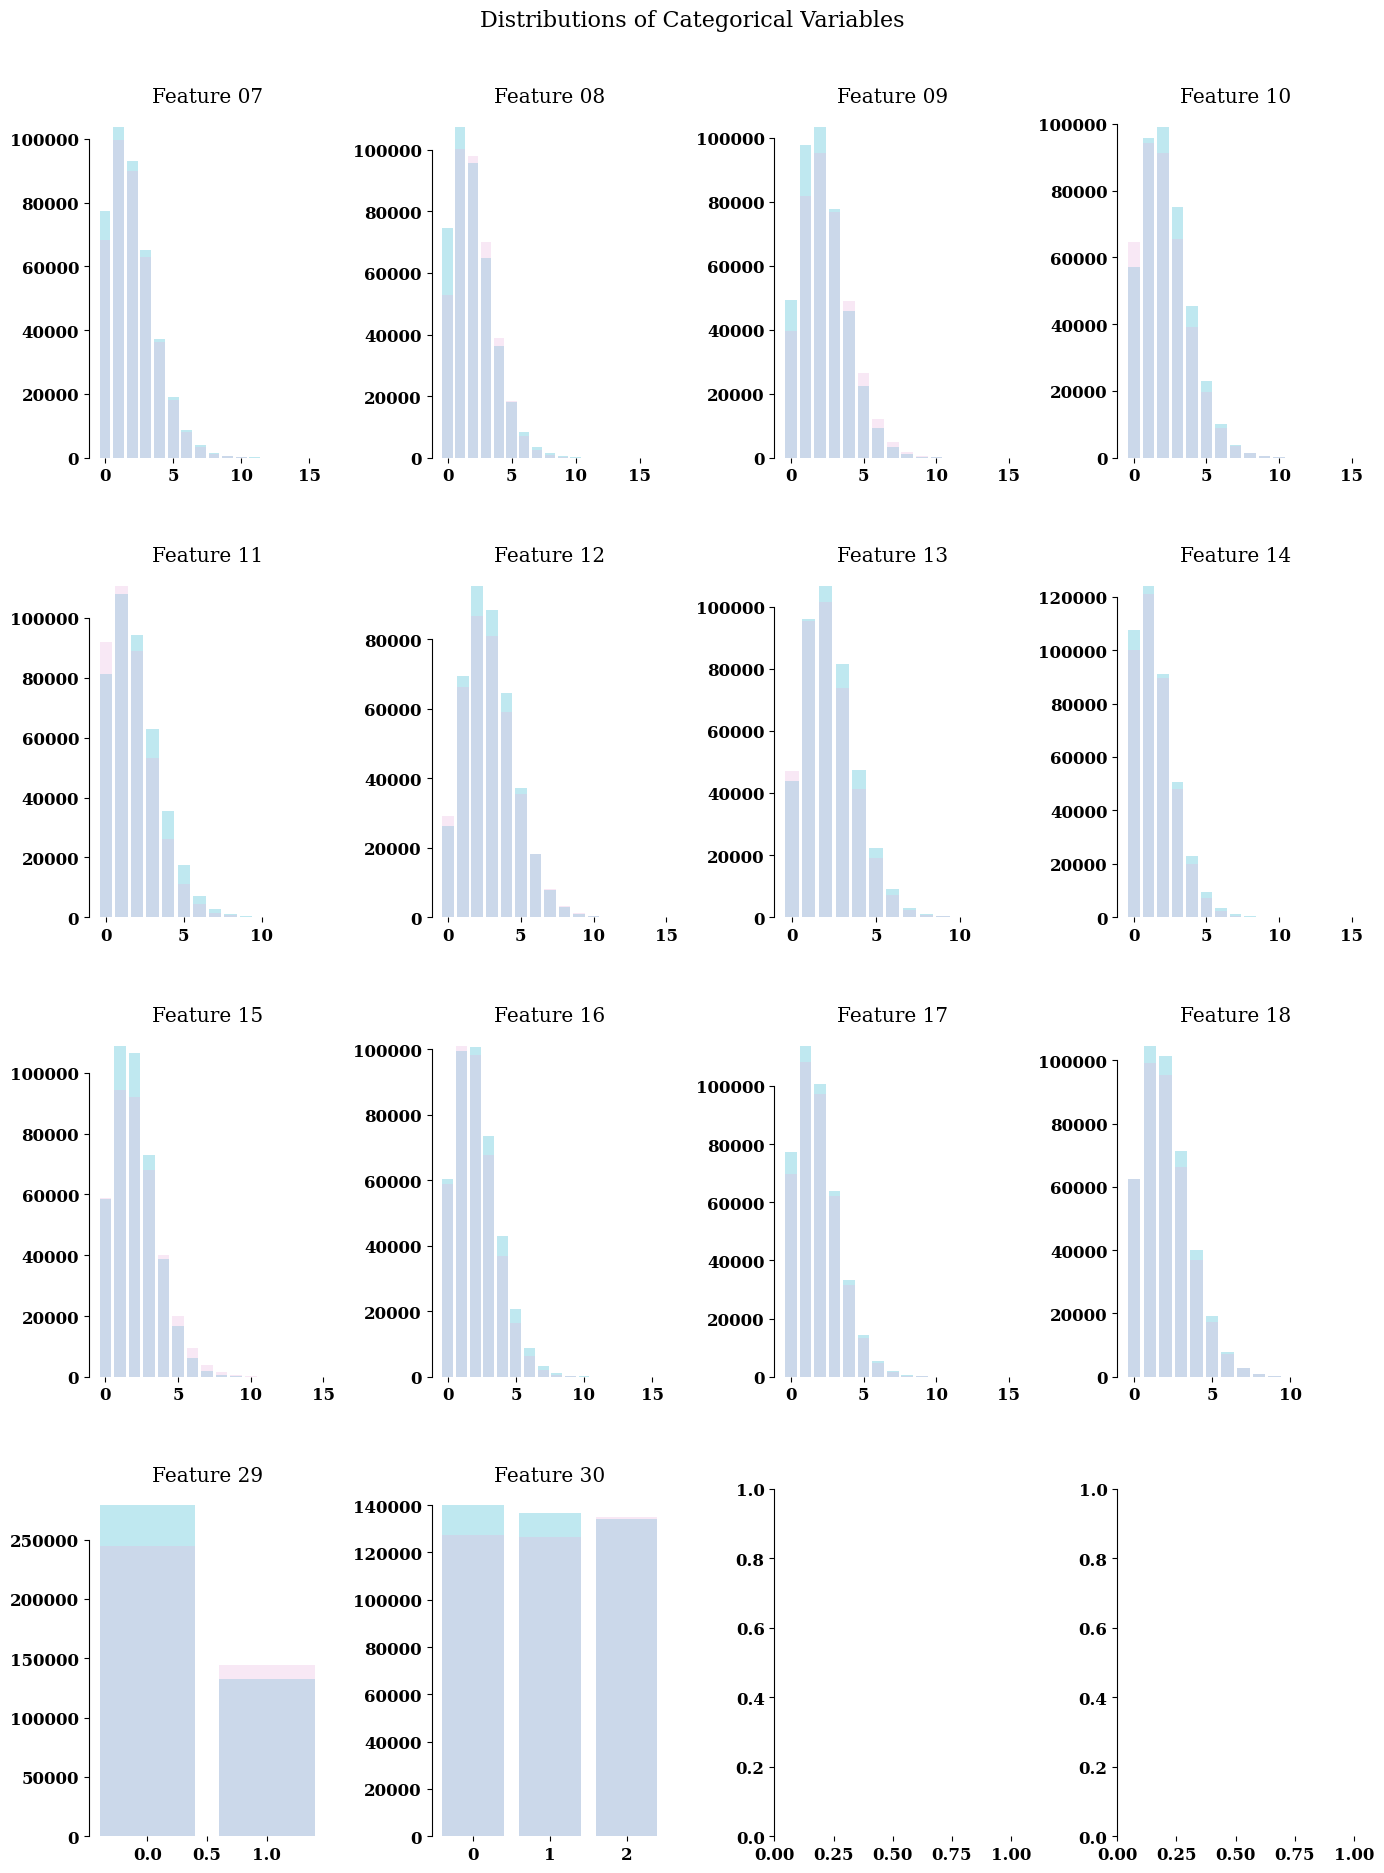

In [14]:
sub_titles=['Feature {}'.format(i.split('_')[-1]) for i in x_int.columns[:-1]]

fig, ax = plt.subplots(4,4, figsize=(14,24))

for i, f in enumerate(x_int.columns[:-1]):
    plt.subplot(4, 4, i+1)
    ax = plt.gca()
    color='#2CB4CF'
    rgb=matplotlib.colors.to_rgba(color,0.3)
    
    vc_0 = x_int[x_int['target']==0][f].value_counts()
    ax.bar(vc_0.index, vc_0, color=rgb)
    
    color='#EAB4DE'
    rgb=matplotlib.colors.to_rgba(color,0.3)
    vc_1 = x_int[x_int['target']==1][f].value_counts()
    ax.bar(vc_1.index, vc_1, color=rgb)
    #ax.hist(train[f], density=False, bins=(train[f].max()-train[f].min()+1))
    #ax.set_xlabel(f'Feature {f}')
    ax.set_title('\n\n{}'.format(sub_titles[i]))
    #ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
sns.despine(bottom=True, trim=True)
plt.suptitle('Distributions of Categorical Variables',fontsize=16)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])
plt.show()


In [15]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [16]:
x_features = pd.concat([x_float,x_int], axis=1)


In [17]:
train_x, cv_x, y_train, y_cv  = train_test_split(x_features,train_df['target'],
                                                 stratify=train_df['target'])

train_x.drop(['target'],axis=1,inplace=True)
cv_x.drop(["target"],axis=1,inplace=True)

lr = LogisticRegression(max_iter=500)
lr.fit(train_x.values, y_train.values)
pred = lr.predict(train_x.values)
print("The train accuracy of the Logistic Regression is ",accuracy_score(y_train.values,pred))
pred  = lr.predict(cv_x.values)
print("The cv accuracy of the Logistic Regression is ",accuracy_score(y_cv.values, pred))


The train accuracy of the Logistic Regression is  0.6150533333333333
The cv accuracy of the Logistic Regression is  0.614395


In [18]:
from scipy import stats
x_float_no = x_float[(np.abs(stats.zscore(x_float))  3).all(axis=1)]
index_list_no = x_float_no.index.to_list()
x_int_no = x_int.iloc[index_list_no]
target_no = x_int_no['target']
x_int_no.drop('target', axis=1, inplace=True)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3566484687.py, line 2)

In [19]:
x_features_no = pd.concat([x_float_no,x_int_no], axis=1)

train_x, cv_x, y_train, y_cv  = train_test_split(x_features_no,target_no,
                                                 stratify=target_no)

#train_x.drop(['target'],axis=1,inplace=True)
#cv_x.drop(["target"],axis=1,inplace=True)

lr = LogisticRegression(max_iter=500)
lr.fit(train_x.values, y_train.values)
pred = lr.predict(train_x.values)
print("The train accuracy of the Logistic Regression without outliers is ",accuracy_score(y_train.values,pred))
pred  = lr.predict(cv_x.values)
print("The cv accuracy of the Logistic Regression without outliers is ",accuracy_score(y_cv.values, pred))


NameError: name 'x_float_no' is not defined

In [20]:
test_x = test_df.select_dtypes(["int","float"])
test_id = test_x['id'].values
test_x.drop("id",axis=1,inplace=True)


In [21]:
pred = lr.predict(test_x.values)


In [22]:
subm.head()


,id,target
0,800000,0.5
1,800001,0.5
2,800002,0.5
3,800003,0.5
4,800004,0.5


In [23]:
#x_features_no.drop('target', axis=1, inplace=True)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_features_no, target_no)


model = RandomForestClassifier(n_jobs=-1)
model.fit(x_train, y_train)


NameError: name 'x_features_no' is not defined

In [25]:
# Use the forest's predict method on the test data
predictions = model.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


NameError: name 'model' is not defined

In [26]:
pred = model.predict(test_df.drop(["id","f_27"],axis=1))


NameError: name 'model' is not defined

In [27]:
submission_df = pd.DataFrame({
    "id" : test_id,
    "target": pred
})
submission_df.to_csv("submission.csv",index=False)
